In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv


In [2]:
df = pd.read_csv("../input/deep-learning-az-ann/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#let us list the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
#let us know the data type of each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# let us get the basic statistical description
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#remove unnecessary columns like row number, surname and customerid
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [9]:
# let see refined data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

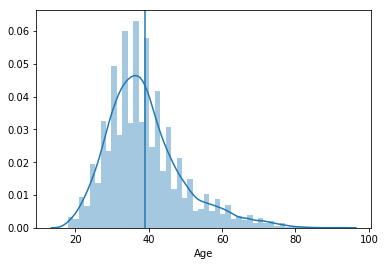

In [11]:
sns.distplot(df["Age"])
plt.axvline(np.mean(df["Age"]))

## Conclusion
1. Here we see that distribution of age is some what right skewed
2. Mean is approx 38

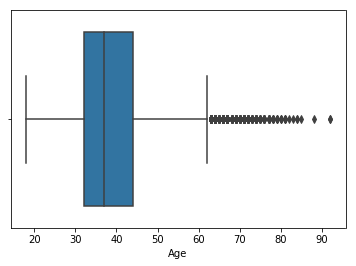

In [12]:
# let us see the box plot

sns.boxplot(df["Age"])

This box plot conclude that there are some outliers too

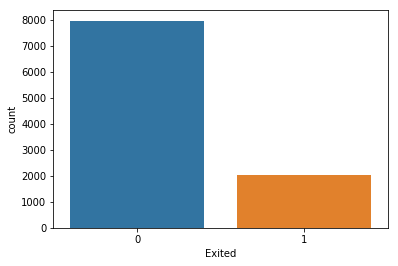

In [13]:
# Let us see how many exit
sns.countplot(df["Exited"])

We have pretty high number of people who have not exited and thus our dataset is not balanced in general

## Some more plotting
Lets see the distrubution of age group by people who have exited

In [14]:
#replace 1 and 0 for the visuals
df["Exited"] = df.Exited.replace({1:"Exited", 0: "Not Exited"})

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Not Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Not Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Not Exited


[Text(0.5, 1.0, 'Box plot of person by Age based on exited or not')]

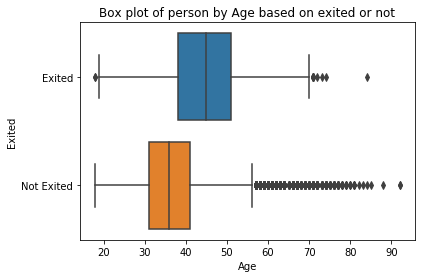

In [16]:
#box plot 
sns.boxplot(x=df["Age"], y=df["Exited"]).set(title="Box plot of person by Age based on exited or not")

## Conclusion
Earlier we saw that we have a large datapoints for people who have not exited.
Here we see that person who has not exited are relatively lowe age than people who have exited. Also there are outliers here. If we see carefully, than we observer that there is a point in exited boxplot which have very less age


"""Let us first see the plot using column gender and then we will have box plot of people grouped bye exited and age"""

[Text(0.5, 1.0, 'Plot by gender')]

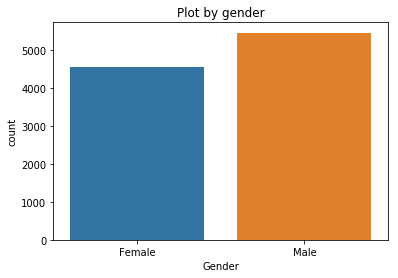

In [17]:
#by gender, we will see that we have pretty much more data for male
sns.countplot(df["Gender"]).set(title="Plot by gender")

[Text(0.5, 1.0, 'Box plot of person by Age based on exited or not')]

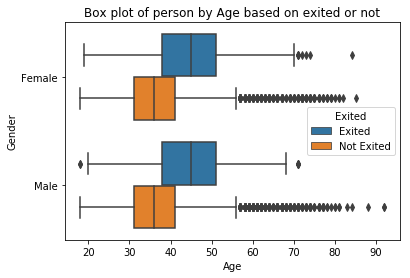

In [18]:
sns.boxplot(x=df["Age"], y=df["Gender"], hue=df["Exited"]).set(title="Box plot of person by Age based on exited or not")

Here we see that plot for both the gender are almost same for each category of exited column. The point to be noted is that in exited category of female section, we have more outliers whereas in nonexited category of male section, we have more outliers.

[Text(0.5, 1.0, 'Count Plot by geography')]

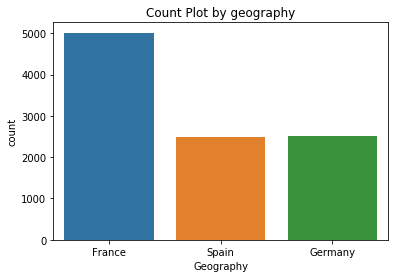

In [19]:
#Lets see the countplot by Geography, it seems we have more data from France
sns.countplot(df["Geography"]).set(title="Count Plot by geography")


[Text(0.5, 1.0, 'Count Plot by geography')]

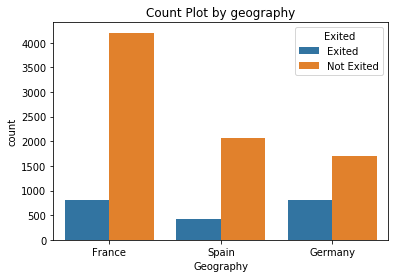

In [20]:
#group by exited
sns.countplot(df["Geography"],hue=df["Exited"]).set(title="Count Plot by geography")


Although we have same total data from Spain and Germany, but it looks like between these two people from Germany have exited more than Spain.

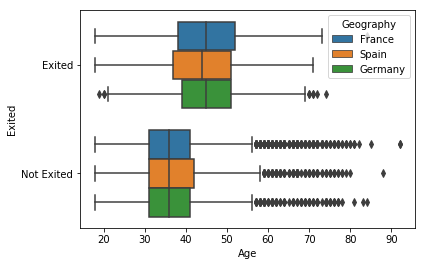

In [21]:
sns.boxplot(x = df["Age"],y = df["Exited"], hue=df["Geography"])

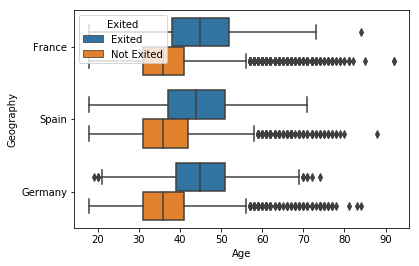

In [22]:
sns.boxplot(x = df["Age"],hue = df["Exited"], y=df["Geography"])

We can see that here outliers are mostly in case of not exited case obviously they are of less age in general than others.

In [23]:
#lets see some more visualization
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
df["HasCrCard"] = df.HasCrCard.replace({1:"Yes", 0:"No"})

[Text(0.5, 1.0, 'Count Plot of Person who has Credit card')]

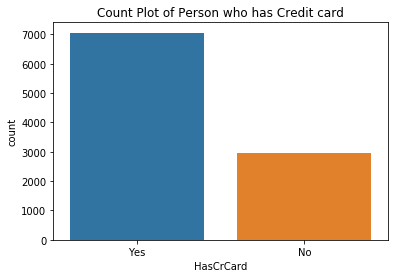

In [25]:
sns.countplot(df["HasCrCard"]).set(title="Count Plot of Person who has Credit card")

[Text(0.5, 1.0, 'Count Plot of Person who has Credit card')]

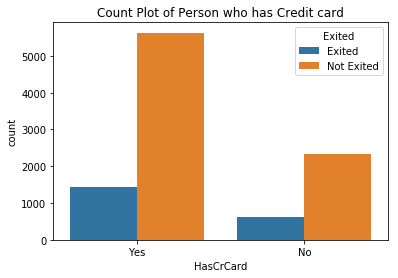

In [26]:
#let us see how many with credit card has exited
sns.countplot(x=df["HasCrCard"], hue=df['Exited']).set(title="Count Plot of Person who has Credit card")

In [27]:
#lets dras 2d contigency table to see how many people have exited with credit card or another way
pd.crosstab(df["Geography"], df["Exited"],normalize="columns")

Exited,Exited,Not Exited
Geography,,
France,0.397644,0.527942
Germany,0.399607,0.212859
Spain,0.202749,0.259199


Despite of having a most dataset from the France, it seems from Germany, more people have exited

In [28]:
pd.crosstab([df.HasCrCard,df.Geography],df.Exited)

Exited               Exited  Not Exited
HasCrCard Geography                    
No        France        241        1230
          Germany       237         481
          Spain         135         621
Yes       France        569        2974
          Germany       577        1214
          Spain         278        1443

In [29]:
#lets normalize with total all
pd.crosstab([df.HasCrCard,df.Geography],df.Exited, normalize='all')

Exited               Exited  Not Exited
HasCrCard Geography                    
No        France     0.0241      0.1230
          Germany    0.0237      0.0481
          Spain      0.0135      0.0621
Yes       France     0.0569      0.2974
          Germany    0.0577      0.1214
          Spain      0.0278      0.1443

In [30]:
#lets normalize with total Columns
pd.crosstab([df.HasCrCard,df.Geography],df.Exited, normalize='columns')

Exited                 Exited  Not Exited
HasCrCard Geography                      
No        France     0.118311    0.154464
          Germany    0.116348    0.060404
          Spain      0.066274    0.077986
Yes       France     0.279332    0.373477
          Germany    0.283260    0.152455
          Spain      0.136475    0.181213

In [31]:
#lets normalize with total all
pd.crosstab([df.HasCrCard,df.Geography],df.Exited, normalize='columns')

Exited                 Exited  Not Exited
HasCrCard Geography                      
No        France     0.118311    0.154464
          Germany    0.116348    0.060404
          Spain      0.066274    0.077986
Yes       France     0.279332    0.373477
          Germany    0.283260    0.152455
          Spain      0.136475    0.181213

Within person who has exited Germany and France as almost similar percentage of people with no credit card. Whereas Spain has less. In  exited category with credit card too both have almost similar. But in non exited category France has more percentage

In [32]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [33]:
pd.crosstab(df.Tenure,df.Exited, normalize="columns")

Exited,Exited,Not Exited
Tenure,,
0,0.046637,0.039935
1,0.113893,0.100841
2,0.098675,0.106367
3,0.104566,0.099962
4,0.099656,0.098707
5,0.102602,0.100841
6,0.096220,0.096823
7,0.086892,0.106869
8,0.096711,0.103981


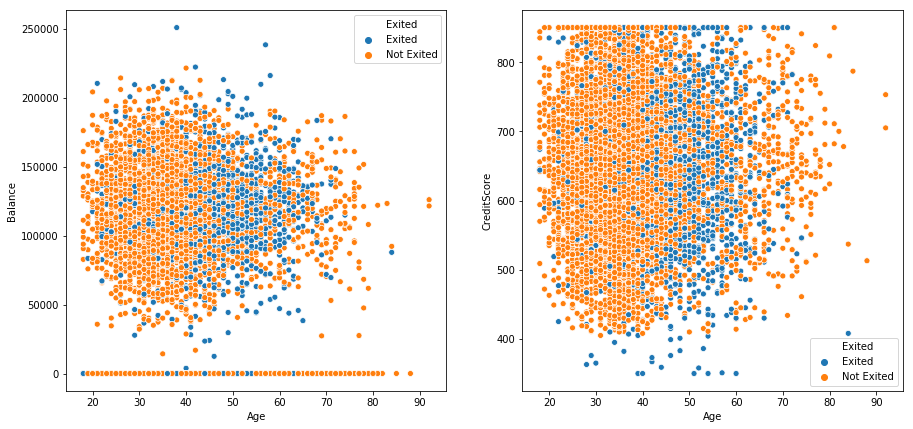

In [34]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

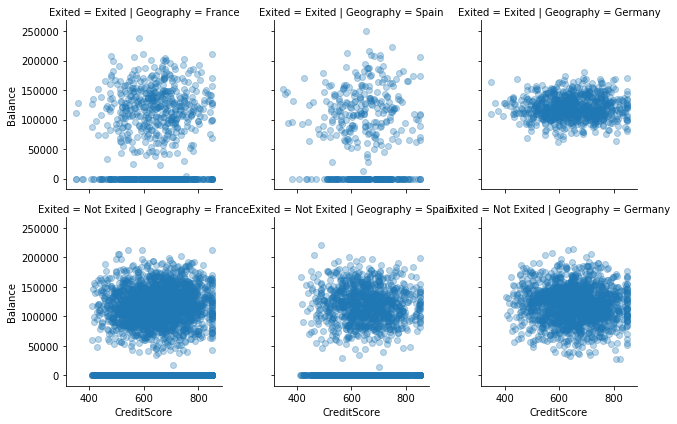

In [35]:
_ = sns.FacetGrid(df, col="Geography",  row="Exited").map(plt.scatter, "CreditScore", "Balance", alpha=0.3).add_legend() #a;pha is intensity

* 40 to 70 years old customers are higher chances to churn
* Customer with credit score less than 400 are higher chances to churn

'Draw a categorical scatterplot with non-overlapping points.\n\nThis function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that\nthey don’t overlap. This gives a better representation of the distribution of values,\nbut it does not scale well to large numbers of observations. \nThis style of plot is sometimes called a “beeswarm”.'

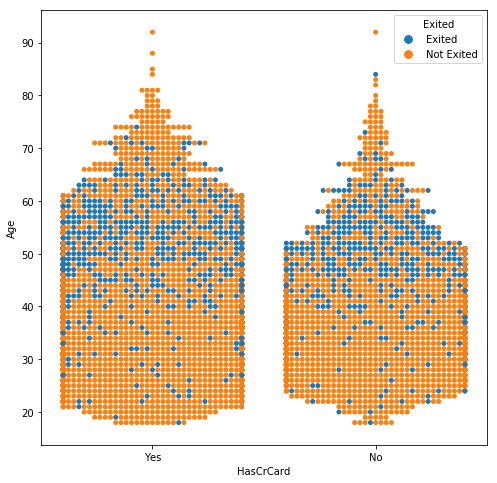

In [36]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = df, hue="Exited")
"""Draw a categorical scatterplot with non-overlapping points.

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that
they don’t overlap. This gives a better representation of the distribution of values,
but it does not scale well to large numbers of observations. 
This style of plot is sometimes called a “beeswarm”."""

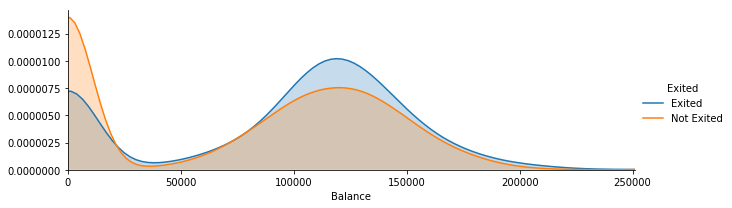

In [37]:
"""Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics."""
facet = sns.FacetGrid(df,hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade=True)
facet.set(xlim=(0,df["Balance"].max()))
facet.add_legend()

plt.show()

## Detecting Outliers using Tukey Boxplot¶


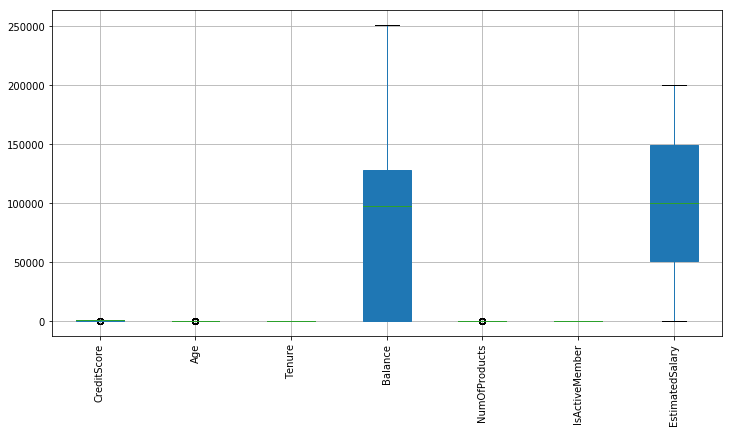

In [38]:
plt.figure(figsize=(12,6))
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

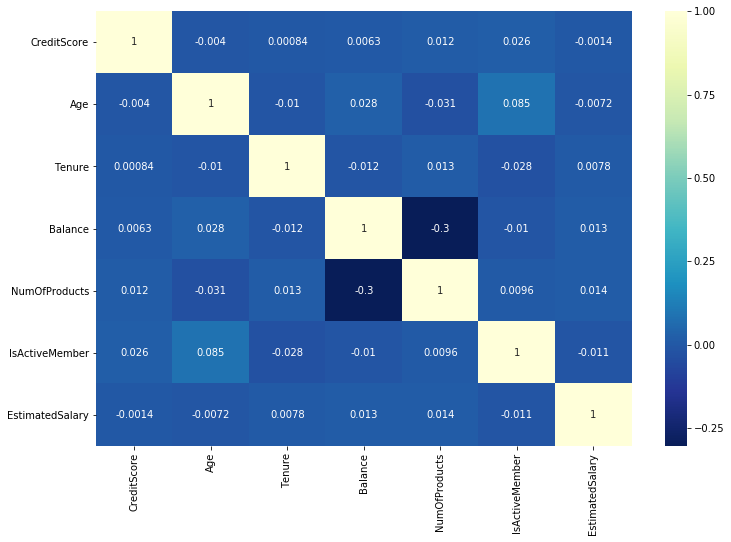

In [39]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu_r")
plt.show()

## Prediction with ml models

In [40]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,1,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No,1,112542.58,Not Exited
2,502,France,Female,42,8,159660.80,3,Yes,0,113931.57,Exited


In [41]:
X = df.drop(["Exited","Geography","Gender","HasCrCard","IsActiveMember"], axis=1)
y = df["Exited"]

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7805

In [45]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7885

In [46]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.764

In [47]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.834

So we compared the prediction with many algorithm, and we also did some data analysis.